# Safe Transaction Project 

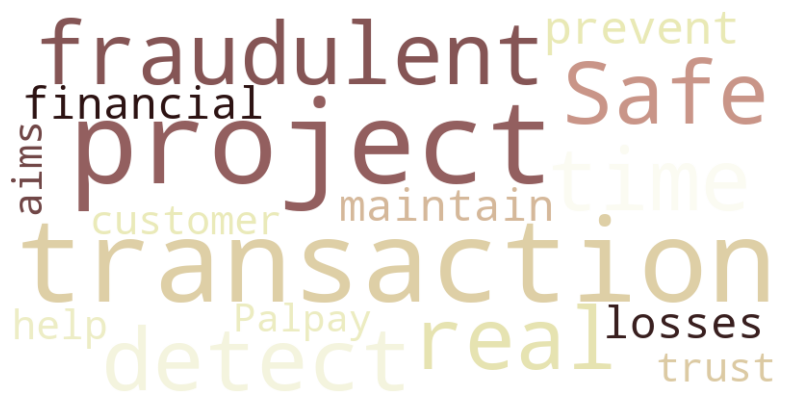

In [58]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text data
text_data = '''
Safe transaction , its a project to detect fraudulent transactions in real-time to
prevent financial losses and maintain customer trust. This project aims to help Palpay.
'''

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='pink').generate(text_data)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('')
plt.show()

### Library Installation

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA

print("hi")


hi


### Read the Data from CSV file 

In [3]:
df = pd.read_csv('copy.csv')

# Step 2: Verify the contents of the DataFrame or its keys (column names)
if df is not None:
    print("Data loaded successfully.")
    print("Column names (keys):", df.keys())
else:
    print("Error loading data from the CSV file.")


Data loaded successfully.
Column names (keys): Index(['Transaction Date ', 'Card Category ', 'Card Type', 'Card Type AR ',
       'Channel ', 'Channel AR ', 'Transaction Type', 'Transaction Type Group',
       'Entry Mode', 'Transaction Status ', 'Outlet ID', ' Merchant Acronym',
       'Merchant Desc', 'Merchant Country', 'Merchant Activity ',
       'Merchant Activity sub ', 'Client Code', 'Amount ', 'Amount USD',
       'Transaction Currency '],
      dtype='object')


### Apply PCA for feature selection 

In [4]:
numeric_features = df.select_dtypes(include=[float, int])

scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_features)

# Apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(numeric_scaled)
print("hi")

hi


In [5]:
print(X_pca)

[[ 0.55694944 -0.3539903   0.42483718]
 [ 0.53128849 -0.28876598  0.40850294]
 [ 0.10680534 -0.31794647  0.77739908]
 ...
 [-1.04544897  0.52512287 -0.70891762]
 [-1.17343229  0.52893036 -0.5796264 ]
 [-1.19992707  0.52640301 -0.55497102]]


## Correlation Heatmap

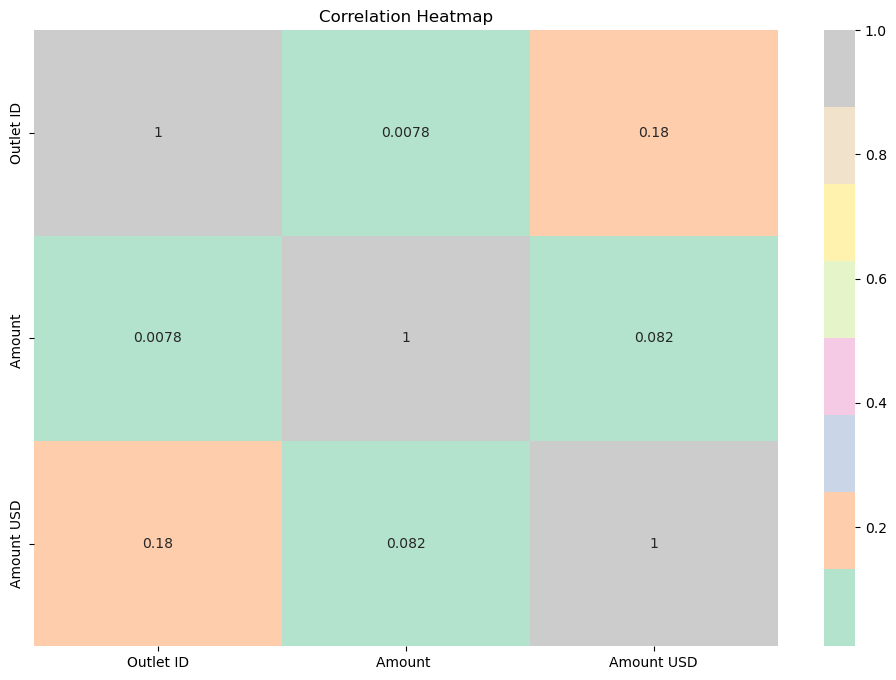

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data = pd.read_csv("./copy.csv")

corr_matrix = df.corr(numeric_only=True)


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Pastel2')

plt.title('Correlation Heatmap')

plt.show()


In [78]:
# print(df.head()) # Print the first few rows of the DataFrame
# print(df.keys()) # Print the column names of the DataFrame


## Pie Plots

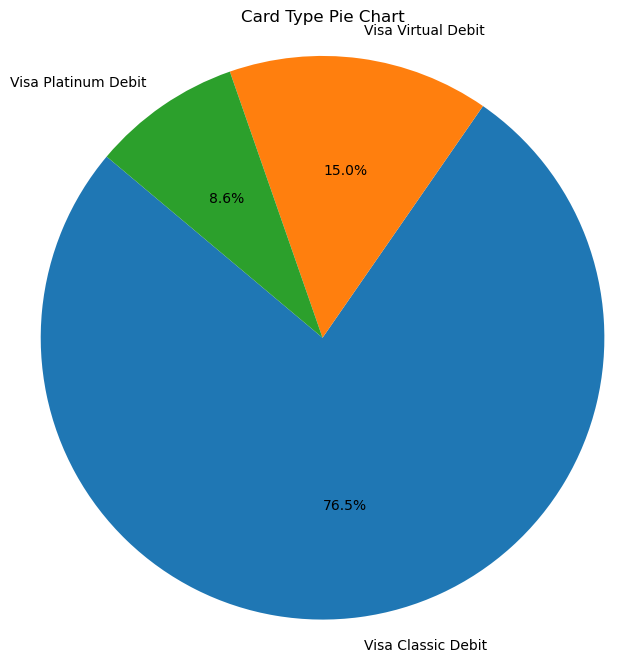

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


card_type_counts = df['Card Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(card_type_counts, labels=card_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Card Type Pie Chart')
plt.axis('equal')  
plt.show()


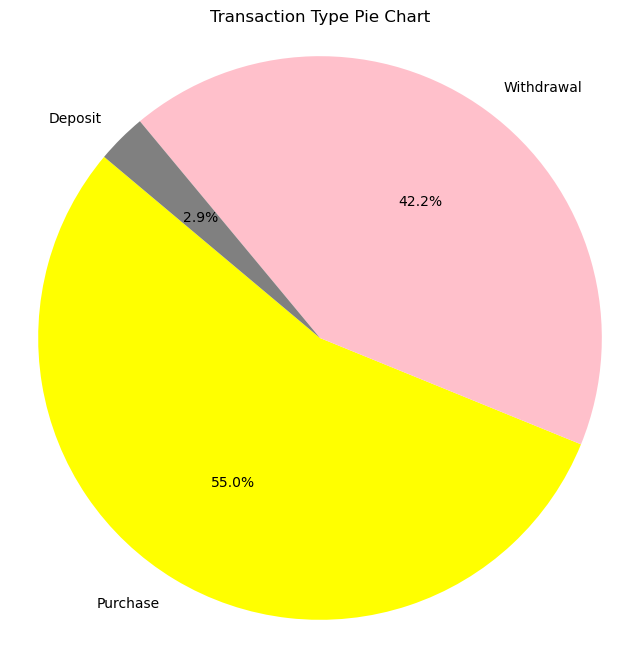

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


card = df['Transaction Type'].value_counts()
custom_colors = ['yellow', 'pink', 'grey']


plt.figure(figsize=(8, 8))
plt.pie(card, labels=card.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Transaction Type Pie Chart')
plt.axis('equal')  
plt.show()


In [12]:
print(df.columns)


Index(['Transaction Date ', 'Card Category ', 'Card Type', 'Card Type AR ',
       'Channel ', 'Channel AR ', 'Transaction Type', 'Transaction Type Group',
       'Entry Mode', 'Transaction Status ', 'Outlet ID', ' Merchant Acronym',
       'Merchant Desc', 'Merchant Country', 'Merchant Activity ',
       'Merchant Activity sub ', 'Client Code', 'Amount ', 'Amount USD',
       'Transaction Currency '],
      dtype='object')


## Histogram For All Numerical Column 

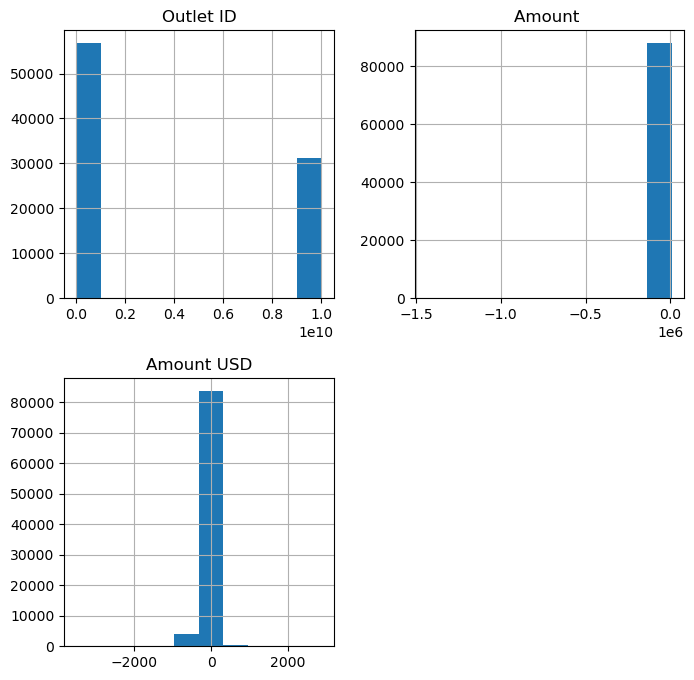

In [21]:


import pandas as pd
import matplotlib.pyplot as plt

data = pd.data =  pd.read_csv('copy.csv')

data.hist(figsize=(8, 8))
plt.show()





## Time Series Plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
data = pd.read_csv('copy.csv')



# Time Series Data
data['Transaction Date '] = pd.to_datetime(data['Transaction Date '])
plt.figure(figsize=(12, 6))
plt.plot(data['Transaction Date '], data['Amount '], marker='o')
plt.xlabel('Transaction Date')
plt.ylabel('Amount')
plt.title('Time Series "Transaction Date" & "Amount"')
plt.grid(True)
plt.show()



## WordCloud 

In [7]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



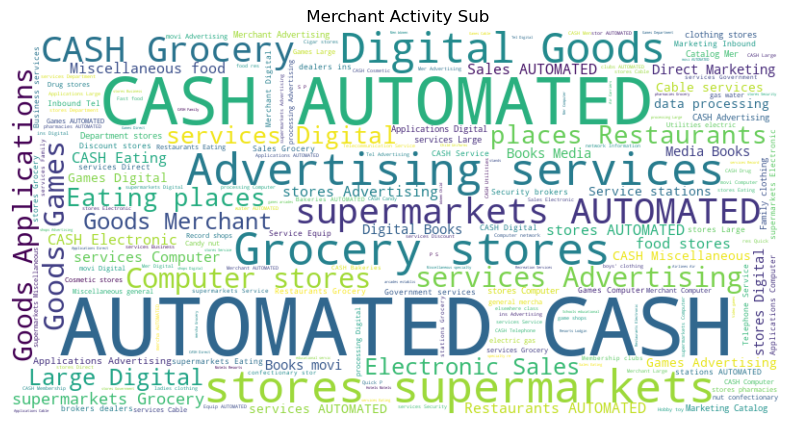

In [67]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('copy.csv')


    # Remove the extra space from the column name 'Merchant Activity sub '
    data.rename(columns={'Merchant Activity sub ': 'Merchant Activity sub'}, inplace=True)

    # Select the 'Merchant Activity sub' column data
    text_data = data['Merchant Activity sub']

    text_data_combined = " ".join(text_data)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data_combined)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.title(' Merchant Activity Sub')
    plt.show()

except KeyError as e:
    print(f"Error: {e}. The specified column name does not exist in the DataFrame.")
except FileNotFoundError:
    print("Error: The CSV file 'copy.csv' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


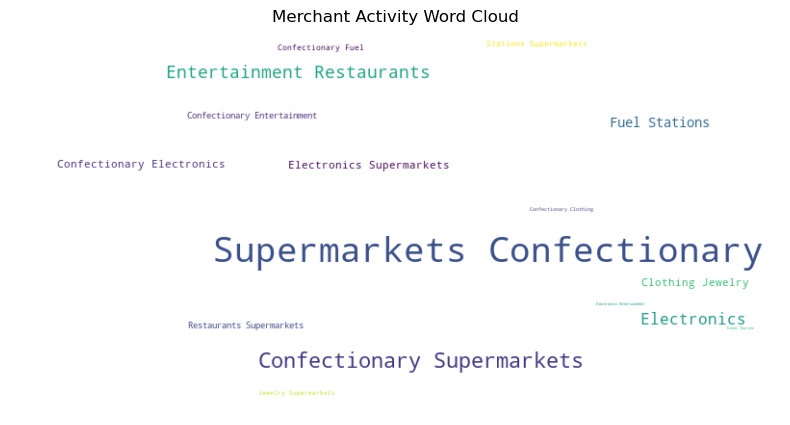

In [76]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('copy.csv')

    data.rename(columns={'Merchant Activity ': 'Merchant Activity'}, inplace=True)

    data['Merchant Activity'] = data['Merchant Activity'].astype(str).replace('nan', '').replace('NAN', '')

    text_data = data['Merchant Activity']

    text_data_combined = " ".join(text_data)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data_combined)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  
    plt.title('Merchant Activity Word Cloud')
    plt.show()

except KeyError as e:
    print(f"Error: {e}. The specified column name does not exist in the DataFrame.")
except FileNotFoundError:
    print("Error: The CSV file 'copy.csv' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")
